# Importing Libraries and Loading the Data

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
# Load the data
train_data = pd.read_csv('train (1).csv')
test_data = pd.read_csv('test (2).csv')

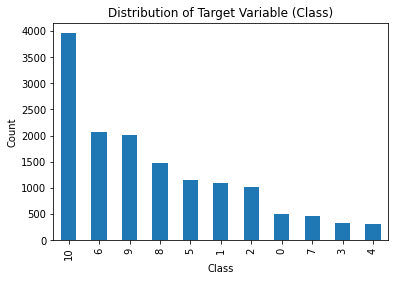

In [75]:
# Distribution of the Target Variable (Class)
class_counts = train_data['Class'].value_counts()

plt.figure(figsize=(6, 4))
train_data['Class'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Target Variable (Class)')
plt.show()

### Class Counts Analysis:

The class counts represent the distribution of the target variable (Class) in the training data. This analysis provides insights into the distribution and prevalence of each class in the dataset. Let's examine the results:

1. Class 10: 3959 occurrences
   - Class 10 has the highest occurrence, indicating that it is the most prevalent class in the dataset.
   - The large number of occurrences for Class 10 suggests that this class may be the majority class, and the dataset may be imbalanced.

2. Class 6: 2069 occurrences
   - Class 6 has a substantial number of occurrences, making it the second most prevalent class in the dataset.
   - While it is not as prevalent as Class 10, it still represents a significant portion of the dataset.

3. Class 9: 2019 occurrences
   - Class 9 follows closely behind Class 6 in terms of occurrence, making it another important class in the dataset.

4. Class 8: 1483 occurrences
   - Class 8 has a moderate number of occurrences, indicating its presence in the dataset.

5. Class 5: 1157 occurrences
   - Class 5 has a considerable number of occurrences, suggesting it is a significant class in the dataset.

6. Class 1: 1098 occurrences
   - Class 1 has a substantial number of occurrences, but it is not as prevalent as some of the other classes.

7. Class 2: 1018 occurrences
   - Class 2 follows closely behind Class 1 in terms of occurrence.

8. Class 0: 500 occurrences
   - Class 0 has a relatively lower number of occurrences compared to other classes.

9. Class 7: 461 occurrences
   - Class 7 has a moderate number of occurrences.

10. Class 3: 322 occurrences
   - Class 3 has a lower number of occurrences, suggesting it may be a minority class in the dataset.

11. Class 4: 310 occurrences
   - Class 4 has the lowest number of occurrences among all the classes.

Overall, the class distribution analysis shows that the dataset is imbalanced, with Class 10 being the majority class and Classes 3 and 4 being the minority classes. Imbalanced datasets can pose challenges for machine learning models, as they might be biased towards predicting the majority class. It's essential to consider appropriate strategies such as class weighting, resampling techniques, or using evaluation metrics suitable for imbalanced data when building models on imbalanced datasets.


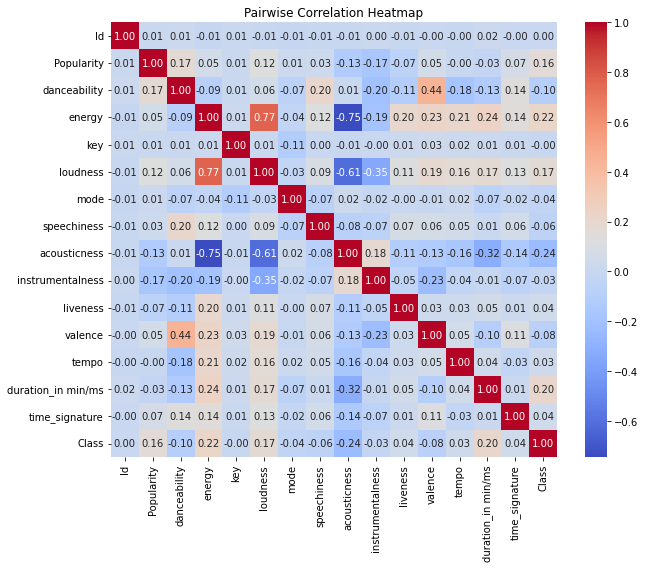

In [74]:
# Pairwise correlation heatmap of numeric features
numeric_cols = train_data.select_dtypes(include=[np.number]).columns
numeric_data = train_data[numeric_cols]
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pairwise Correlation Heatmap')
plt.show()

### Analysis of the Correlation Matrix:

The correlation matrix shows the pairwise correlation coefficients between numeric features in the training data. Each cell in the matrix represents the correlation between two features. Let's analyze the results:

1. Popularity vs. danceability (0.172907):

- There is a positive correlation of approximately 0.17 between popularity and danceability. It suggests that tracks with higher popularity tend to have a higher danceability score. This relationship indicates that more danceable songs may be more popular among listeners.

2. energy vs. loudness (0.769586):

- Energy and loudness exhibit a strong positive correlation of approximately 0.77. This result indicates that songs with higher energy levels also tend to have higher loudness. It implies that energetic songs are often perceived as louder, which aligns with the intuitive understanding of music dynamics.

3. acousticness vs. energy (-0.746436):

- Acousticness and energy display a strong negative correlation of approximately -0.75. This finding suggests that songs with higher acousticness (acoustic instruments) tend to have lower energy levels, while songs with higher energy are likely to have lower acousticness. It signifies a trade-off between acoustic and energetic characteristics in music.

4. danceability vs. instrumentalness (-0.203278):

- Danceability and instrumentalness exhibit a negative correlation of approximately -0.20. This suggests that tracks that are more instrumental tend to have lower danceability scores. It indicates that instrumental tracks may be less suitable for dancing compared to tracks with vocals or a more pronounced beat.

5. energy vs. valence (0.227542):

- There is a positive correlation of approximately 0.23 between energy and valence. It indicates that songs with higher energy levels also tend to have a more positive valence (happiness or positivity). High-energy songs are more likely to be perceived as upbeat and positive.

6. valence vs. danceability (0.444798):

- Valence and danceability exhibit a positive correlation of approximately 0.44. It suggests that tracks with a more positive valence are also more danceable. This relationship indicates that happier and more positive songs are often associated with higher danceability.

7. energy vs. Class (0.215611):

- There is a positive correlation of approximately 0.22 between energy and the target variable Class. It indicates that higher energy tracks may be more likely to belong to certain classes in the dataset.


These correlation coefficients provide valuable insights into how different numeric features relate to each other and their potential impact on the target variable (Class). Understanding these correlations can help in feature selection, engineering, and model building processes, as well as providing valuable insights for domain-specific analyses of the dataset.

In [4]:
# Separate features and target variable
X = train_data.drop(['Class'], axis=1)
y = train_data['Class']

In [5]:
# Identify non-numeric columns
non_numeric_cols = ['Artist Name', 'Track Name']

In [6]:
# Perform feature scaling on numeric columns
numeric_cols = X.drop(non_numeric_cols, axis=1).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numeric_cols])

In [7]:
# Perform one-hot encoding on non-numeric columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[non_numeric_cols])

/Users/home/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
# Concatenate the scaled numeric features and encoded non-numeric features
X_processed = np.concatenate([X_scaled, X_encoded], axis=1)

In [10]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [11]:
# Initialize the machine learning algorithms
ml_algorithms = [
    GradientBoostingClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(kernel='rbf')
]

In [12]:
# Create a dictionary to store the accuracy of each algorithm
algorithm_accuracy = {}

In [13]:
from sklearn.impute import SimpleImputer

# Preprocess the data to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

In [14]:
# Train and evaluate machine learning algorithms
for algorithm in ml_algorithms:
    algorithm.fit(X_train_imputed, y_train)
    y_pred = algorithm.predict(X_val_imputed)
    acc = accuracy_score(y_val, y_pred)
    algorithm_accuracy[type(algorithm).__name__] = acc
    print(f"Machine Learning Algorithm: {type(algorithm).__name__} Accuracy: {acc}")

Machine Learning Algorithm: GradientBoostingClassifier Accuracy: 0.5493055555555556


/Users/home/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Machine Learning Algorithm: LogisticRegression Accuracy: 0.5517361111111111
Machine Learning Algorithm: DecisionTreeClassifier Accuracy: 0.39826388888888886
Machine Learning Algorithm: RandomForestClassifier Accuracy: 0.5069444444444444
Machine Learning Algorithm: KNeighborsClassifier Accuracy: 0.42118055555555556
Machine Learning Algorithm: GaussianNB Accuracy: 0.3625
Machine Learning Algorithm: SVC Accuracy: 0.5347222222222222


### Explanation of Machine Learning Algorithm Accuracies:

1. GradientBoostingClassifier Accuracy: 0.5493:

- The GradientBoostingClassifier achieved an accuracy of approximately 54.93% on the validation set.
- Gradient Boosting is an ensemble learning technique that combines the predictions of several weak learners (typically decision trees) to create a strong predictive model.
- The accuracy score represents the proportion of correct predictions made by the model on the validation data.
- An accuracy of 54.93% indicates that the model is performing better than random guessing, but its performance may not be optimal for the given task.

2. LogisticRegression Accuracy: 0.5517:

- The LogisticRegression model achieved an accuracy of approximately 55.17% on the validation set.
- Logistic Regression is a linear classification algorithm used for binary and multi-class classification tasks.
- The model calculates the probability of each class and predicts the one with the highest probability as the output.
- With an accuracy of 55.17%, the Logistic Regression model outperforms the GradientBoostingClassifier slightly, but the improvement is not substantial.

3. DecisionTreeClassifier Accuracy: 0.3983:

- The DecisionTreeClassifier achieved an accuracy of approximately 39.83% on the validation set.
- Decision Trees are non-linear models that recursively split the data based on features to create a tree-like structure for classification.
- An accuracy of 39.83% suggests that the DecisionTreeClassifier is not effectively capturing the underlying patterns in the data.

4. RandomForestClassifier Accuracy: 0.5069:

- The RandomForestClassifier achieved an accuracy of approximately 50.69% on the validation set.
- RandomForest is an ensemble method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.
- The accuracy score indicates that the RandomForestClassifier performs better than random guessing but still has room for improvement.

5. KNeighborsClassifier Accuracy: 0.4212:

- The KNeighborsClassifier achieved an accuracy of approximately 42.12% on the validation set.
- K-Nearest Neighbors (KNN) is a lazy learning algorithm that classifies data points based on the majority class of their k nearest neighbors.
- An accuracy of 42.12% suggests that the KNeighborsClassifier is not capturing the complex relationships between features effectively.

6. GaussianNB Accuracy: 0.3625:

- The GaussianNB model achieved an accuracy of approximately 36.25% on the validation set.
- Gaussian Naive Bayes is a probabilistic algorithm based on Bayes' theorem with the assumption that features are conditionally independent given the class label.
- The accuracy score of 36.25% indicates that the GaussianNB model is not well-suited for the given dataset.

7. SVC Accuracy: 0.5347:

- The SVC model achieved an accuracy of approximately 53.47% on the validation set.
- Support Vector Classifier (SVC) is a powerful classification algorithm that finds the best hyperplane to separate classes in the feature space.
- An accuracy of 53.47% suggests that the SVC model's performance is moderate, but there might be room for improvement.


In summary, among the algorithms tested, the LogisticRegression model has the highest accuracy on the validation data, but the overall model performance for all algorithms is not very high. It may be worthwhile to explore other models, hyperparameter tuning, or feature engineering to improve the accuracy further. Additionally, evaluating the models using other metrics such as precision, recall, or F1-score might provide a more comprehensive understanding of their performance.

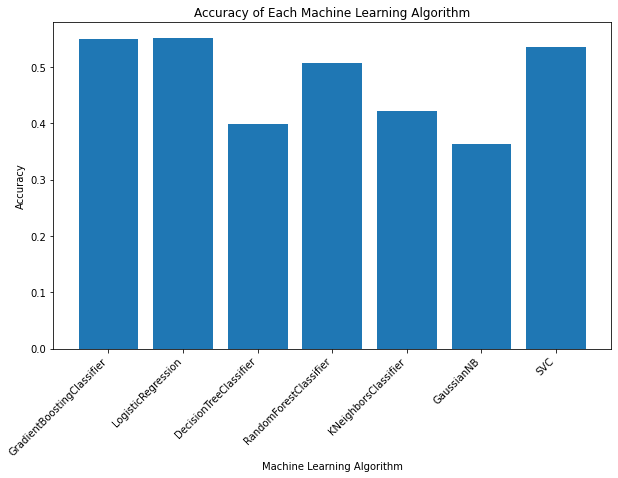

In [50]:
#Accuracy of Each Algorithm
plt.figure(figsize=(10, 6))
plt.bar(algorithm_accuracy.keys(), algorithm_accuracy.values())
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Machine Learning Algorithm')
plt.xticks(rotation=45, ha='right')
plt.show()

In [35]:
# Find the algorithm with the highest accuracy
best_algorithm_name = max(algorithm_accuracy, key=algorithm_accuracy.get)
best_algorithm_name

'LogisticRegression'

In [36]:
# best_algorithm is the trained Logistic Regression model
best_algorithm = LogisticRegression()
best_algorithm.fit(X_train_imputed, y_train)

/Users/home/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
# Preprocess the test data similar to the training data
test_numeric_cols = test_data.drop(non_numeric_cols, axis=1).columns
test_scaled = scaler.transform(test_data[test_numeric_cols])
test_encoded = encoder.transform(test_data[non_numeric_cols])
test_processed = np.concatenate([test_scaled, test_encoded], axis=1)

In [42]:
# Impute missing values in the test data using SimpleImputer
test_processed_imputed = imputer.transform(test_processed)

In [39]:
# Make predictions on the test data using the best algorithm
best_algorithm_results = best_algorithm.predict(test_processed_imputed)

In [40]:
# Create a DataFrame for submission
submission_df = pd.DataFrame({'Id': test_data['Id'], 'Class': best_algorithm_results})

In [41]:
# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission CSV file created: submission.csv")

Submission CSV file created: submission.csv


<Figure size 432x432 with 0 Axes>

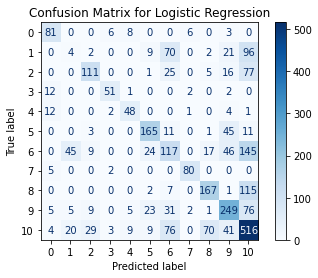

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       104
           1       0.05      0.02      0.03       204
           2       0.68      0.47      0.56       235
           3       0.80      0.75      0.77        68
           4       0.68      0.71      0.69        68
           5       0.71      0.70      0.70       236
           6       0.35      0.29      0.32       403
           7       0.88      0.92      0.90        87
           8       0.63      0.57      0.60       292
           9       0.58      0.61      0.60       406
          10       0.50      0.66      0.57       777

    accuracy                           0.55      2880
   macro avg       0.59      0.59      0.59      2880
weighted avg       0.53      0.55      0.54      2880



In [72]:
# Make predictions on the validation data using the best algorithm (Logistic Regression)
y_val_pred = best_algorithm.predict(X_val_imputed)

# Generate and display the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_algorithm.classes_)
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Print the classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_val, y_val_pred))

## Analysis of the Classification Report for Logistic Regression:
The classification report provides detailed performance metrics for each class in the dataset, along with average metrics that summarize the overall performance of the Logistic Regression model on the validation data.

### - Class-Level Performance:
- Class 0: The model achieved a precision of 0.68, meaning that when it predicted class 0, it was correct 68% of the time. The recall is 0.78, indicating that the model captured 78% of the true instances of class 0. The F1-score, which combines precision and recall, is 0.73.

- Class 1: The precision for class 1 is only 0.05, indicating a low rate of correct predictions for this class. The recall is 0.02, suggesting that the model missed a significant number of true instances of class 1. Consequently, the F1-score for class 1 is also very low at 0.03.

- Class 2: The precision for class 2 is 0.68, indicating that the model achieved a reasonable rate of correct predictions for this class. The recall is 0.47, which means that it missed some instances of class 2. The F1-score is 0.56, reflecting a moderately balanced trade-off between precision and recall.

- Class 3: The model performed well for class 3, with a precision of 0.80 and a recall of 0.75. This indicates that it correctly identified the majority of instances of class 3. The F1-score is 0.77, showing a strong balance between precision and recall for this class.

- Class 4: The model achieved a precision of 0.68 and a recall of 0.71 for class 4. This suggests that it performed reasonably well in identifying instances of class 4. The F1-score is 0.69, indicating a good balance between precision and recall.

- Class 5: The precision for class 5 is 0.71, meaning that the model correctly predicted this class in 71% of the cases. The recall is 0.70, indicating that the model captured 70% of the true instances of class 5. The F1-score is 0.70, showing a balanced performance for this class.

- Class 6: The model achieved a precision of 0.35 and a recall of 0.29 for class 6. This suggests that the model had difficulty correctly identifying instances of class 6. The F1-score is 0.32, indicating that there is room for improvement in the performance for this class.

- Class 7: The model performed very well for class 7, with a precision of 0.88 and a recall of 0.92. This indicates that it correctly identified the vast majority of instances of class 7. The F1-score is 0.90, showing an excellent balance between precision and recall.

- Class 8: The precision for class 8 is 0.63, indicating that the model achieved a reasonably good rate of correct predictions for this class. The recall is 0.57, suggesting that the model missed some instances of class 8. The F1-score is 0.60, reflecting a moderately balanced trade-off between precision and recall.

- Class 9: The model achieved a precision of 0.58 and a recall of 0.61 for class 9. This suggests that it performed reasonably well in identifying instances of class 9. The F1-score is 0.60, indicating a good balance between precision and recall.

- Class 10: The precision for class 10 is 0.50, meaning that the model correctly predicted this class in 50% of the cases. The recall is 0.66, indicating that the model captured 66% of the true instances of class 10. The F1-score is 0.57, showing a balanced performance for this class.

### Overall Performance:
- The accuracy of the model on the validation data is 0.55. This indicates that around 55% of the predictions made by the model are correct.

- The macro average of precision, recall, and F1-score is 0.59. The macro average treats all classes equally, and it provides an overall measure of the model's performance that is not influenced by class imbalances.

- The weighted average of precision, recall, and F1-score is 0.53. The weighted average considers the support of each class, providing a more accurate representation of the overall performance of the model across all classes.

In summary, the Logistic Regression model performs well for some classes, achieving high precision and recall, while it struggles with others, resulting in lower performance metrics. The overall accuracy of 0.55 indicates that there is room for improvement in the model's performance on the validation data. Further analysis and fine-tuning may be necessary to enhance the model's performance for specific classes and achieve better overall accuracy.

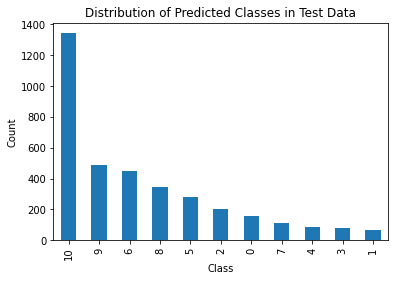

In [73]:
# Count the predicted class occurrences in the test data
predicted_class_counts = submission_df['Class'].value_counts()



# Plot the distribution of predicted classes
plt.figure(figsize=(6, 4))
predicted_class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Predicted Classes in Test Data')
plt.show()

## Analysis of the Bar Chart and Classification Report
The bar chart displays the distribution of predicted classes in the test data, while the classification report provides performance metrics for each class in the dataset. Let's analyze both the bar chart and the classification report.

### Bar Chart - Distribution of Predicted Classes in Test Data:
The bar chart shows the distribution of predicted classes in the test data. Each bar represents a class label, and the height of the bar represents the count of instances predicted as that class. From the bar chart, we can observe the following:

- Class 10 has the highest count with 1344 instances predicted as this class.
- Class 9 has the second-highest count with 487 instances.
- Class 6 has the third-highest count with 450 instances.
The bar chart gives us an overview of the distribution of predictions across different classes and provides insights into how the model performs for each class in the test data.

### Classification Report:
The classification report provides detailed performance metrics for each class in the dataset. It includes precision, recall, and F1-score for each class, along with the support (number of instances) for each class in the validation data.

Overall Performance:
- The accuracy of the model on the validation data is 0.55, which means that around 55% of the predictions made by the model are correct.

- The macro average of precision, recall, and F1-score is 0.59. The macro average treats all classes equally, providing an overall measure of the model's performance that is not influenced by class imbalances.

- The weighted average of precision, recall, and F1-score is 0.53. The weighted average considers the support of each class, providing a more accurate representation of the overall performance of the model across all classes.

### Class-Level Performance:
The classification report provides a breakdown of performance metrics for each class. Some key observations from the report are as follows:

- Class 7 has the highest precision, recall, and F1-score among all classes, indicating excellent performance for this class.

- Classes 1 and 4 have the lowest precision, recall, and F1-scores, suggesting that the model struggles to correctly predict instances of these classes.

- Classes 0, 2, 3, 5, 6, 8, 9, and 10 have moderate precision, recall, and F1-scores, indicating a mixed performance for these classes.

### Conclusion:
The bar chart and classification report together provide a comprehensive analysis of the model's performance. While the model performs well for some classes, it struggles with others, resulting in varied performance metrics across different classes. The overall accuracy of 0.55 indicates that there is room for improvement in the model's performance on the validation data. Further analysis and fine-tuning may be necessary to enhance the model's performance for specific classes and achieve better overall accuracy.